**Import Libraries**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ipl.csv')

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [5]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [6]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [8]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [10]:
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [11]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [12]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [13]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\adity\AppData\Local\Temp\ipykernel_7936\2417374447.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


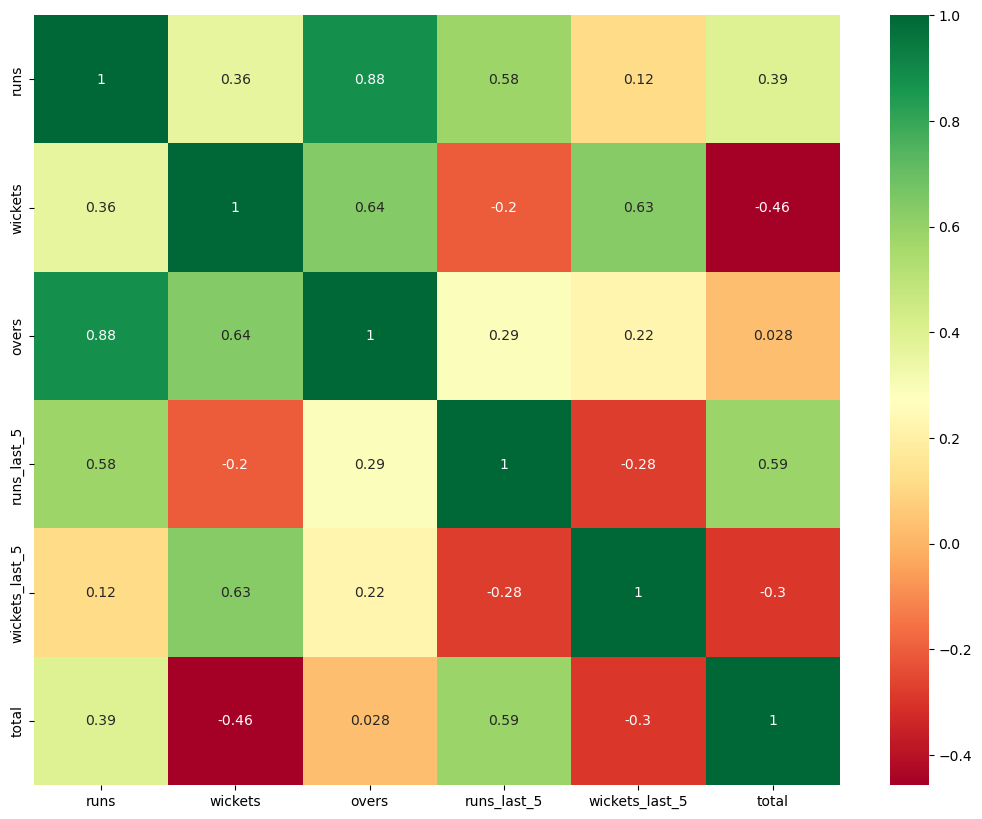

In [14]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [15]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [16]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [18]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


In [19]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred_lr = linear_regressor.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.118617546193295
Mean Squared Error (MSE): 251.0079231041742
Root Mean Squared Error (RMSE): 15.8432295667321
